<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/12_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=B5GtZuUvujQ

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-12-1-hello-rnn.py

# cell

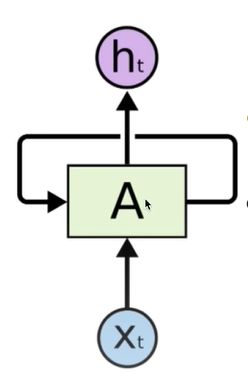

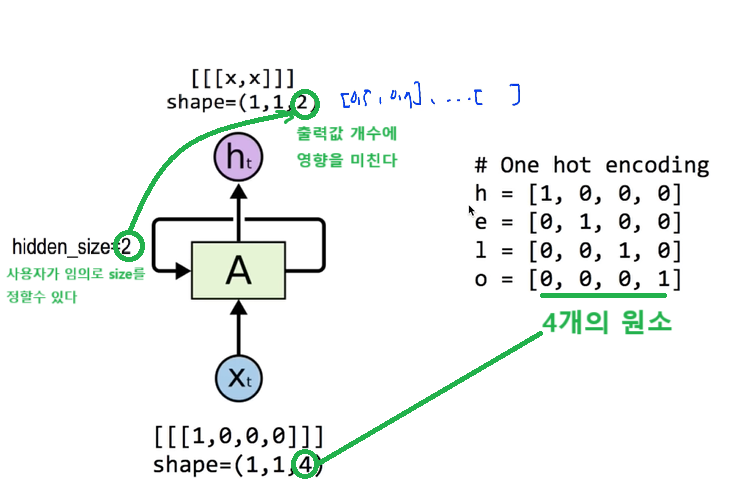

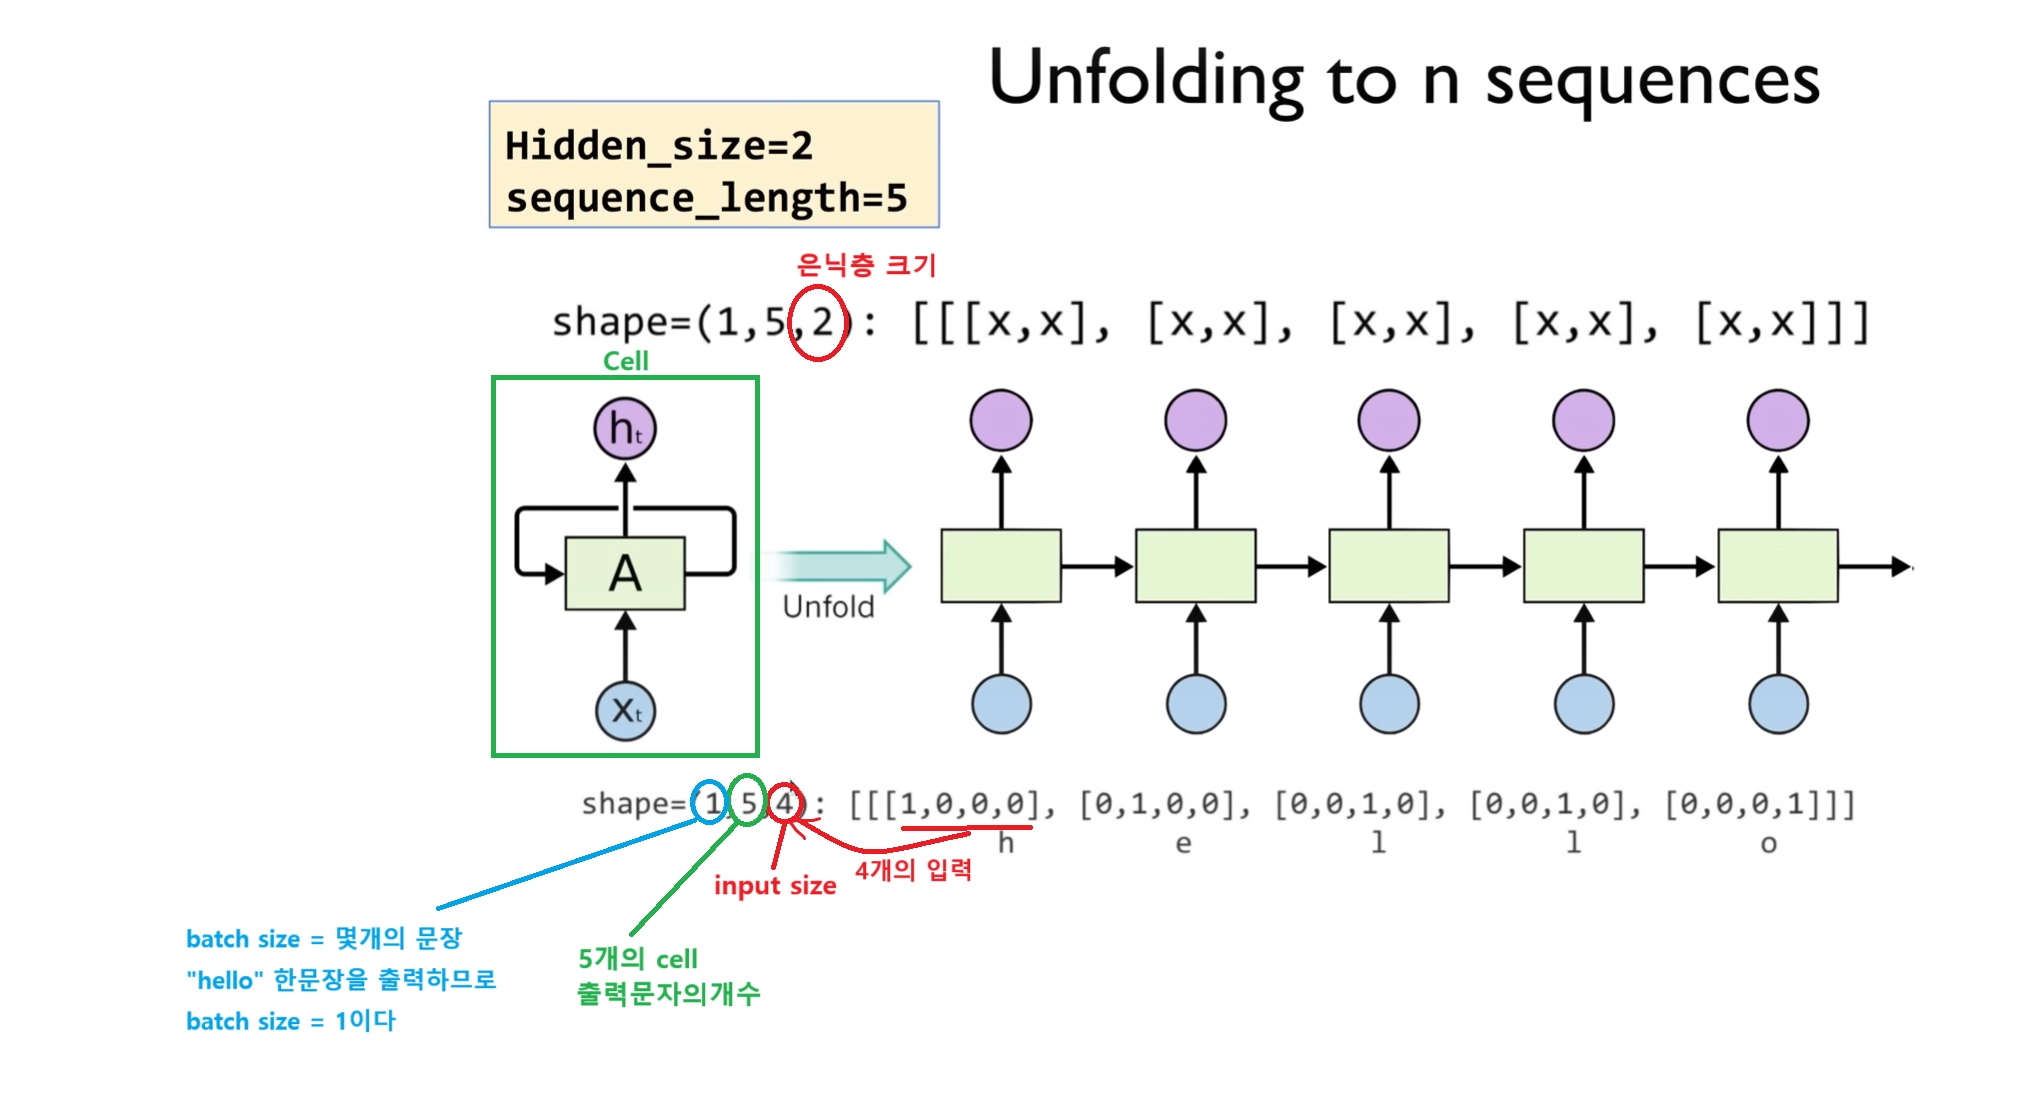

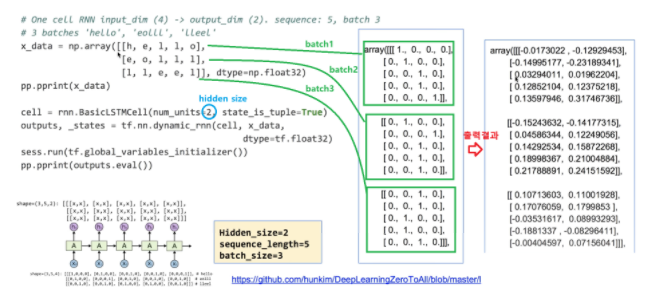

In [2]:
# Lab 12 RNN
import numpy as np
import tensorflow as tf

idx2char = ['h', 'i', 'e', 'l', 'o'] # 입력 문자, 중복되지않는 문자들과 리스트를통한 인덱스번호입력, unique
# Teach hello: hihell -> ihello
# x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello # 출력결과

num_classes = 5 # Hidden size (은닉층 개수)
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6 # 출력 크기, cell 갯수
learning_rate = 0.1

# 원핫인코딩
x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

tf.model = tf.keras.Sequential()

# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, size of input dim
cell = tf.keras.layers.LSTMCell(units=num_classes, input_shape=(sequence_length, input_dim)) # cell 생성
tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))

# single LSTM layer can be used as well instead of creating LSTMCell
# tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, input_dim), return_sequences=True))

# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])

# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()



(1, 6, 5)
(1, 6, 5)
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1667 - loss: 1.6289
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3333 - loss: 1.5109
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3333 - loss: 1.4134
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3333 - loss: 1.3193
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3333 - loss: 1.1995
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 1.0572
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6667 - loss: 0.9262
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 0.8158
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6667 - loss: 0.7264
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 0.6473
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8333 - loss: 0.5763
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.833

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rnn_1 (RNN)                          │ (None, 6, 5)                │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 6, 5)                │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 752 (2.94 KB)

 Trainable params: 250 (1000.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 502 (1.96 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
[[1.9856136e-04 9.9650311e-01 3.2897398e-03 5.5135683e-06 3.1726565e-06]
 [9.9716336e-01 3.9070408e-04 1.4675576e-03 6.4234878e-04 3.3589138e-04]
 [1.0101338e-03 1.7201793e-03 9.9721503e-01 5.4713317e-05 6.3784871e-09]
 [4.4831299e-04 7.1204176e-06 7.0804963e-05 9.9927610e-01 1.9761376e-04]
 [1.3014792e-04 1.3726420e-06 1.0831230e-06 9.9895573e-01 9.1164839e-04]
 [3.4124005e-04 6.1014944e-05 7.8747386e-10 2.1582192e-03 9.9743950e-01]]
	Prediction str:  ihello


In [3]:
predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str)) # 결과 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.9856136e-04 9.9650311e-01 3.2897398e-03 5.5135683e-06 3.1726565e-06]
 [9.9716336e-01 3.9070408e-04 1.4675576e-03 6.4234878e-04 3.3589138e-04]
 [1.0101338e-03 1.7201793e-03 9.9721503e-01 5.4713317e-05 6.3784871e-09]
 [4.4831299e-04 7.1204176e-06 7.0804963e-05 9.9927610e-01 1.9761376e-04]
 [1.3014792e-04 1.3726420e-06 1.0831230e-06 9.9895573e-01 9.1164839e-04]
 [3.4124005e-04 6.1014944e-05 7.8747386e-10 2.1582192e-03 9.9743950e-01]]
	Prediction str:  ihello
